# **Imports**

In [54]:
#basics
import pandas as pd
import numpy as np

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import model_selection

#GMM clustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import mixture

# neural network
from sklearn import neural_network

# evaluation
from scipy import stats
from sklearn import metrics

# visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Principal Component Decomposition**


     principal component 1  ...  principal component 5
0                 4.143335  ...              -1.170453
1                49.923272  ...              19.607943
2               -40.487903  ...               3.350777
3                49.702673  ...              19.191944
4               -18.955910  ...              13.064756
..                     ...  ...                    ...
506             -26.872042  ...               4.446755
507              38.392018  ...             -14.777584
508              -0.572606  ...             -12.130223
509             -16.971819  ...              12.898654
510              52.143352  ...              20.057350

[511 rows x 5 columns]


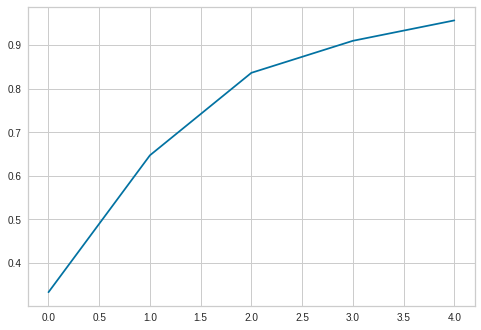

In [55]:
x = pd.read_csv('dataset_10.csv')

pca = PCA(n_components=5) # I could say pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
print(principalDf)
cumsum5 = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum5)

# **Reducing Dimensionality for Data Visualisation**

     principal component 1  principal component 2  principal component 3
0                 4.143335              29.612798              36.701112
1                49.923272              -2.732370              -3.023602
2               -40.487903              44.462657             -10.621639
3                49.702673              -3.564282              -2.138836
4               -18.955910             -14.698657              14.889059
..                     ...                    ...                    ...
506             -26.872042             -31.733800             -22.773209
507              38.392018              27.895383             -27.652231
508              -0.572606             -20.116189              30.140483
509             -16.971819             -13.052571              11.681528
510              52.143352              -2.711031              -3.894817

[511 rows x 3 columns]


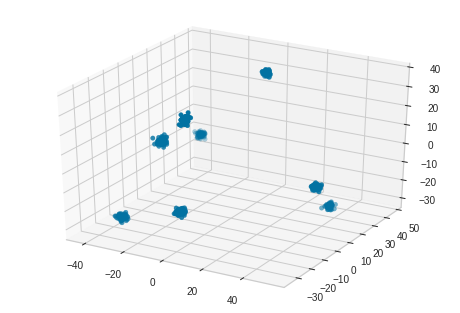

In [56]:
pca_visu = PCA(n_components=0.80)
PC_visu = pca_visu.fit_transform(x)
principal_visu = pd.DataFrame(data = PC_visu, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
cumsum3 = np.cumsum(pca_visu.explained_variance_ratio_)
# plt.plot(cumsum3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(principal_visu)
#Axes3D.scatter(principal_visu)
ax.scatter(principal_visu.iloc[:,0], principal_visu.iloc[:,1], principal_visu.iloc[:,2])

# **Silhouette score**

In [57]:
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = principalDf

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
print(S)

[0.3178783847205954, 0.4098483002944237, 0.5833451793743428, 0.7060556568552235, 0.7823146767905685, 0.85031981635461, 0.9341900078122809, 0.8226981622724889, 0.7289741996039715]


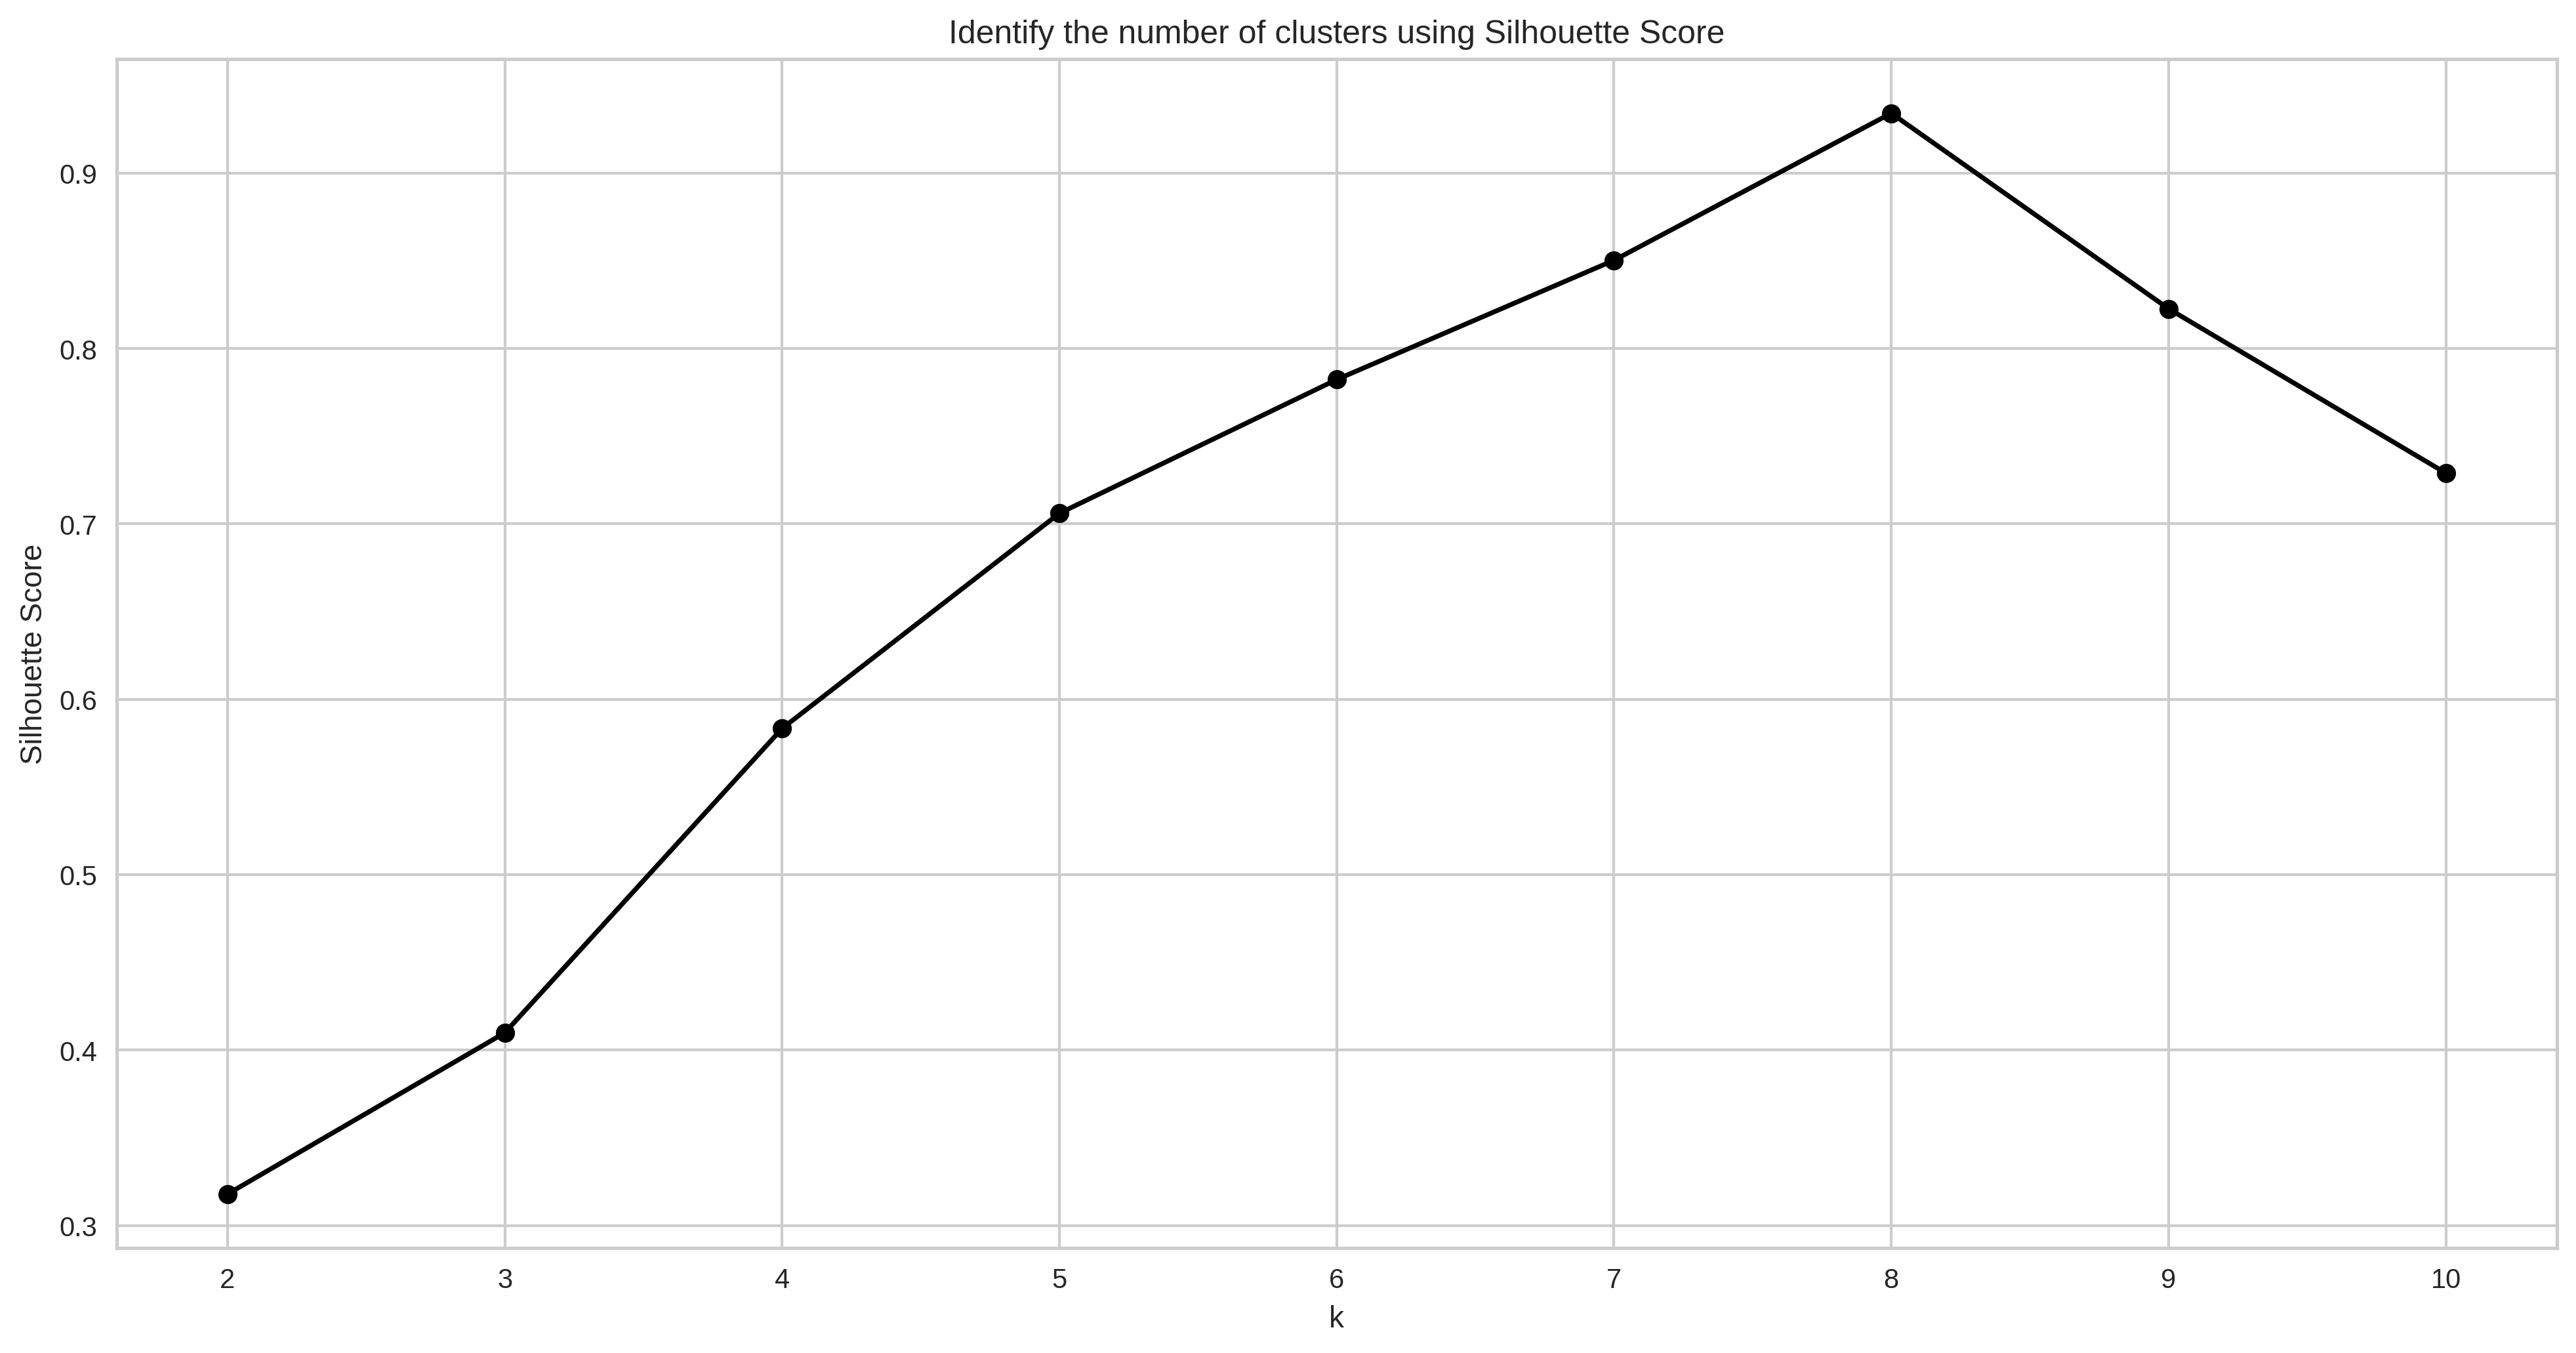

In [58]:
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

# **Elbow Score**

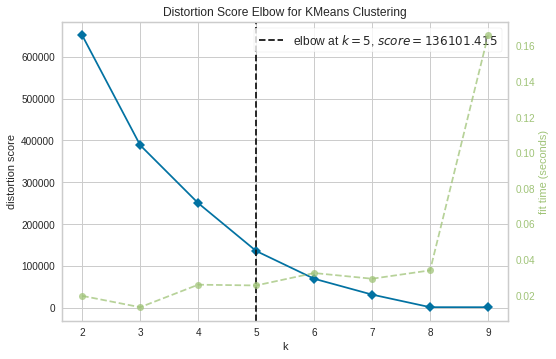

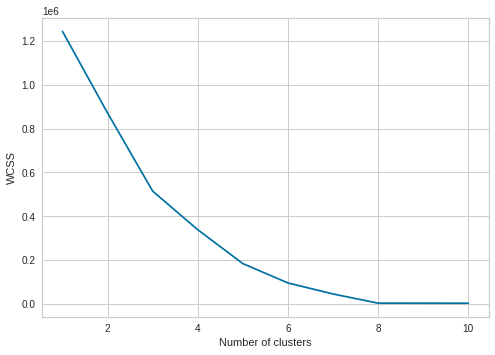

In [15]:
# library

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(train)
visualizer.show()

# more from scratch
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)  # init is a way of initialising the centroids
    kmeans.fit(principalDf) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# **GMM initialisation**

In [14]:
 # for calculating Silhouette score
# libraries
np.random.seed(1)
df = pd.read_csv('dataset_10.csv',header=None)
g = mixture.GaussianMixture(n_components = 8)
train, test = train_test_split(principalDf)
train = np.array(train.values)
test = np.array(test.values)

# **GMM from scratch-ish**

In [ ]:
X = principalDf
print(X[0]) # there is something wrong with the shape of this
n_components = 8
max_iter = 100
def multivariate_normal(X, mean_vector, covariance_matrix):
    return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

def fit(X):
  # Spliting the data in n_components sub-sets
  new_X = np.array_split(X, n_components)
  # Initial computation of the mean-vector and covarience matrix
  mean_vector = [np.mean(x, axis=0) for x in new_X]
  covariance_matrices = [np.cov(x.T) for x in new_X]

pi = [1/n_components for component in range(n_components)]

for iteration in range(max_iter):
  r = np.zeros((len(X), n_components))
  #print(r[0][1])
  for n in range(len(X)):
    for k in range(n_components):
      print(pi[k])
      print(X[n])
      r[n][k] = pi[k] * multivariate_normal(X[n], mean_vector[k], covariance_matrices[k])
      r[n][k] /= sum([pi[j]*multivariate_normal(X[n], mean_vector[j], covariance_matrixes[j]) for j in range(n_components)])
    # Calculating the N
    N = np.sum(r, axis=0)

# -----------------M step---------------
mean_vector = np.zeros((n_components, len(X[0])))
for k in range(n_components):
    for n in range(len(X)):
        mean_vector[k] += r[n][k] * X[n]
        mean_vector = [1/N[k]*mean_vector[k] for k in range(n_components)]

covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(n_components)]
# Updating the covariance matrices
for k in range(n_components):
    covariance_matrixes[k] = np.cov(X.T, aweights=(r[:, k]), ddof=0)
covariance_matrixes = [1/N[k]*covariance_matrixes[k] for k in range(n_components)]
# Updating the pi list
pi = [N[k]/len(X) for k in range(n_components)]

def predict(X):
  probas = []
  for n in range(len(X)):
    probas.append([multivariate_normal(X[n], mean_vector[k], covariance_matrices[k]) for k in range(n_components)])


KeyError: ignored

# **AIC and BIC**

True


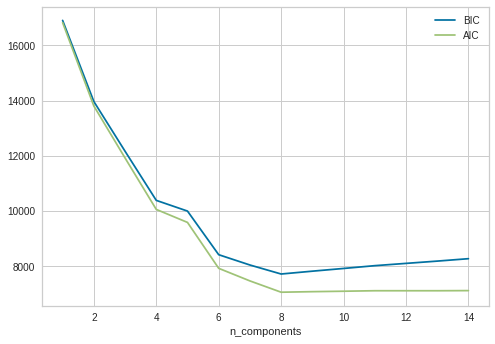

In [59]:
n_components = np.arange(1, 15)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(train)
          for n in n_components]

plt.plot(n_components, [m.bic(train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
gmm = mixture.GaussianMixture(8, covariance_type='full', random_state=0)
gmm.fit(principalDf)
print(gmm.converged_)

# **GMM Fitting with 8 clusters**

In [17]:
model = mixture.GaussianMixture(n_components=8, n_init=20, init_params='kmeans')
labels = model.fit_predict(train,test)
metrics.silhouette_score(train, labels, metric='euclidean')

0.9342998918123974

# **Linear Regression from scratch-ish**#

In [37]:

class LogisticRegression:
    def __init__(self, learning_rate : float = 0.05, max_iter : int = 100000) -> None:
        '''
            The constructor of the Logistic Regression model.
                :param learning_rate: float, default=0.05
                    The learning rate of the model.
                :param max_iter: int, default = 100000
                    The number of iteration to go throw.
        '''
        # Setting up the hyperparameters.
        self.__learning_rate = learning_rate
        self.__max_iter = max_iter
    
    def sigmoid(self, y : 'np.array') -> 'np.array':
        '''
            The sigmoid function.
                :param y: np.array
                    The predictions of the linear function.
        '''
        return 1 / (1 + np.exp(-y))
    
#    def fit(self, X : 'np.array', y : 'np.array') -> LogisticRegression:
        '''
            The fit function of the model.
                :param X: 2-d np.array
                    The matrix with the features.
                :param y: 1-d np.array
                    The target vector.
        '''
        # Creatting the weights vector,
        self.coef_ = np.zeros(len(X[0])+1)
        
        # Adding the intercept column.
        X = np.hstack((X, np.ones((len(X), 1))))
        
        # The weights updating process.
        for i in range(self.__max_iter):
            # Prediction.
            pred = self.sigmoid(np.dot(X, self.coef_))
            
            # Computing the gradient.
            gradient = np.dot(X.T, (pred - y)) / y.size
            
            # Updating the weights.
            self.coef_ -= gradient * self.__learning_rate
        return self
    
    def predict_proba(self, X : 'np.array') -> 'np.array':
        '''
            This function returns the class probabilities.
                :param X: 2-d np.array
                    The features matrix.
                :retunr: 2-d, np.array
                    The array with the probabilities for every class for every sample.
        '''
        # Adding the intercept column. 
        X = np.hstack((X, np.ones((len(X), 1))))
        
        # Computing the probabilities.
        prob = self.sigmoid(np.dot(X, self.coef_))
        
        # Returning the probabilities.
        return np.hstack(((1 - prob).reshape(-1, 1),
                          prob.reshape(-1, 1)))
    
    def predict(self, X : 'np.array') -> 'np.array':
        '''
            This function returns the predictions of the model.
                :param X: 2-d np.array
                    The features matrix.
                :retunr: 2-d, np.array
                    The array with the probabilities for every class for every sample.
        '''
        # Adding the intercept column. 
        X = np.hstack((X, np.ones((len(X), 1))))
        return (self.sigmoid(np.dot(X, self.coef_)) > 0.5) * 1

# **Task 2 using sklearn**

0.18559300581857718


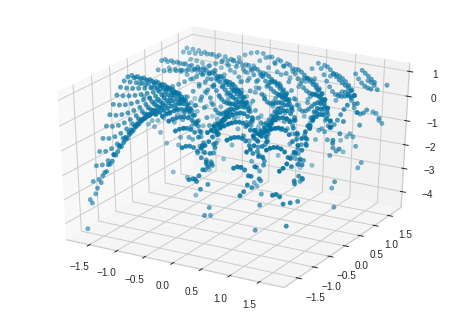

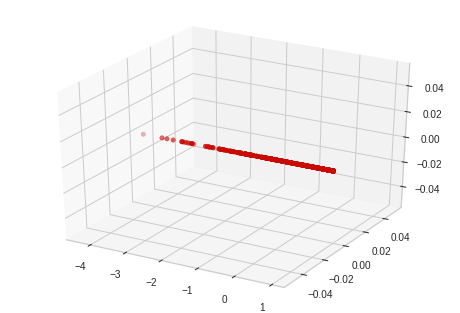

In [53]:
#np.random.seed(1234)

# preprocessing
task2 = pd.read_csv('train.csv',header=None)
task2 = pd.DataFrame(task2).to_numpy()
scaler = MinMaxScaler()
X = task2[:, :-1]
target = task2[:, -1]
X = preprocessing.scale(X) # we need to scale it because we would've used PCA which would have scaled it automatically
target = preprocessing.scale(target)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, target)

# neural network
scores = []

model = neural_network.MLPRegressor(activation='tanh',solver = 'lbfgs', alpha = 0.7, hidden_layer_sizes=7, max_iter = 2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))


# evaluation
# print(model.score(X_test, y_test))
# model_selection.cross_val_score(model, X, target, scoring='neg_mean_squared_error'))
# model_selection.cross_val_score(model, X, target, scoring='r2'))

# visualisation data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],target)
plt.show()

# visualisation target?
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target,ys=0, c='r')
plt.show()

In [ ]:
# use neural_network.partial_fit